### Importing Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

### Plotting keypoints using mediapipe mp_holistic

In [2]:
mp_holistic = mp.solutions.holistic # Creating instance for Holistic model
mp_drawing = mp.solutions.drawing_utils # Creating instance for Drawing utilities

In [3]:
# Function for Holistic Model processing of RGB images
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Colour conversion BGR 2 RGB
    image.flags.writeable = False                  # Making Image to no longer writeable
    results = model.process(image)                 # Make prediction using the model
    image.flags.writeable = True                   # Making Image writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Colour Conversion RGB 2 BGR
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    # Drawing face contours
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Drawing pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Drawing left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Drawing right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [95]:
#Accessing the camera
cap = cv2.VideoCapture(0)
# Setting the mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Reading the camera feed using OpenCV
        ret, frame = cap.read()

        # Making detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Drawing face, hand and pose landmarks 
        draw_styled_landmarks(image, results)

        # Showing on the screen
        cv2.imshow('OpenCV Feed', image)

        # Breaking the live feed and releasing the camera
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

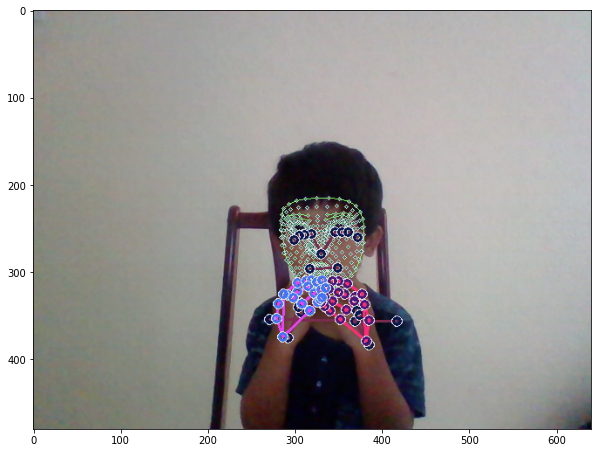

In [343]:
#Showing the last frame
draw_styled_landmarks(frame, results)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Extracting Keypoint values

In [9]:
len(results.face_landmarks.landmark)

468

In [10]:
# Function to extract the keypoints from the feed frames
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

### Setting up folders for image collection

In [151]:
# Setting up the path for the captured data as numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we are considering for prediction
actions = np.array(['Hello', 'Thanks', 'Iloveyou'])

# Set of thirty videos for each action 
no_sequences = 30

# Set of thirty frames for each video (Video length)
sequence_length = 30

In [88]:
# Creating folders to collect the key points as numpy arrays
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### Creating datapoints for modelling

In [93]:

#Accessing the camera
cap = cv2.VideoCapture(0)
# Setting the mediapipe model  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Looping through all actions
    for action in actions:
        # Looping through all sequences of videos
        for sequence in range(no_sequences):
            # Looping through all frames in each video (Video leangth)
            for frame_num in range(sequence_length):

                # Reading the camera feed using OpenCV
                ret, frame = cap.read()

                # Making detections
                image, results = mediapipe_detection(frame, holistic)

                # Drawing face, hand and pose landmark
                draw_styled_landmarks(image, results)
                
                # Applying wait logic before collecting the first Video
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Showing on the screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                # wait logic before collecting the following Videos
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Showing on the screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Exporting the keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Breaking the live feed and releasing the camera
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

### Data Preprocessing

In [143]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [317]:
#Loading the data to result(X) and labels(y)
label_map = {label:num for num, label in enumerate(actions)}
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            result = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(result)
        sequences.append(window)
        labels.append(label_map[action])

In [229]:
np.array(sequences).shape

(90, 30, 1662)

In [154]:
np.array(labels).shape

(90,)

In [319]:
X = np.array(sequences)

In [318]:
y = to_categorical(labels).astype(int)

In [320]:
# Splitting the data set to train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [309]:
X.shape

(90, 30, 1662)

In [310]:
y.shape

(90, 3)

In [311]:
X_train.shape

(72, 30, 1662)

In [312]:
y_train.shape

(72, 3)

In [314]:
X_test.shape

(18, 30, 1662)

In [315]:
y_test.shape

(18, 3)

### Building the model with LSTM

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [321]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [322]:
# Model using tensorflow Sequential Model
model = Sequential()
# Adding 3 LSTM layers
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
# Adding 3 Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [323]:
# Setting the optimizer, loss function and metrics
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [326]:
# Training the model with 800 epochs
model.fit(X_train, y_train, epochs=800, callbacks=[tb_callback])

Epoch 1/800
3/3 [==============================] - 2s 717ms/step - loss: 2.3005 - categorical_accuracy: 0.2917
Epoch 2/800
3/3 [==============================] - 0s 100ms/step - loss: 2.0577 - categorical_accuracy: 0.3472
Epoch 3/800
3/3 [==============================] - 0s 77ms/step - loss: 1.8734 - categorical_accuracy: 0.4444
Epoch 4/800
3/3 [==============================] - 0s 99ms/step - loss: 4.5336 - categorical_accuracy: 0.3889
Epoch 5/800
3/3 [==============================] - 0s 89ms/step - loss: 6.3357 - categorical_accuracy: 0.3333
Epoch 6/800
3/3 [==============================] - 0s 92ms/step - loss: 2.9695 - categorical_accuracy: 0.3333
Epoch 7/800
3/3 [==============================] - 0s 79ms/step - loss: 5.0680 - categorical_accuracy: 0.3889
Epoch 8/800
3/3 [==============================] - 0s 74ms/step - loss: 12.3113 - categorical_accuracy: 0.4028
Epoch 9/800
3/3 [==============================] - 0s 79ms/step - loss: 35.0325 - categorical_accuracy: 0.2639
Epoch 

3/3 [==============================] - 0s 90ms/step - loss: 4.5633 - categorical_accuracy: 0.6944
Epoch 146/800
3/3 [==============================] - 0s 91ms/step - loss: 3.6981 - categorical_accuracy: 0.6944
Epoch 147/800
3/3 [==============================] - 0s 96ms/step - loss: 3.3256 - categorical_accuracy: 0.7083
Epoch 148/800
3/3 [==============================] - 0s 95ms/step - loss: 5.9870 - categorical_accuracy: 0.6944
Epoch 149/800
3/3 [==============================] - 0s 81ms/step - loss: 3.9235 - categorical_accuracy: 0.6806
Epoch 150/800
3/3 [==============================] - 0s 113ms/step - loss: 6.6014 - categorical_accuracy: 0.7083
Epoch 151/800
3/3 [==============================] - 0s 129ms/step - loss: 8.4023 - categorical_accuracy: 0.5278
Epoch 152/800
3/3 [==============================] - 0s 83ms/step - loss: 12.2951 - categorical_accuracy: 0.5556
Epoch 153/800
3/3 [==============================] - 0s 131ms/step - loss: 7.6896 - categorical_accuracy: 0.5278
Ep

3/3 [==============================] - 1s 210ms/step - loss: 1.4475 - categorical_accuracy: 0.6806
Epoch 290/800
3/3 [==============================] - 1s 170ms/step - loss: 0.9963 - categorical_accuracy: 0.7361
Epoch 291/800
3/3 [==============================] - 1s 182ms/step - loss: 1.1718 - categorical_accuracy: 0.6944
Epoch 292/800
3/3 [==============================] - 1s 191ms/step - loss: 1.1691 - categorical_accuracy: 0.6806
Epoch 293/800
3/3 [==============================] - 1s 239ms/step - loss: 2.2451 - categorical_accuracy: 0.7083
Epoch 294/800
3/3 [==============================] - 1s 225ms/step - loss: 0.9587 - categorical_accuracy: 0.7083
Epoch 295/800
3/3 [==============================] - 1s 211ms/step - loss: 1.0586 - categorical_accuracy: 0.7083
Epoch 296/800
3/3 [==============================] - 1s 215ms/step - loss: 1.5914 - categorical_accuracy: 0.6250
Epoch 297/800
3/3 [==============================] - 0s 170ms/step - loss: 1.0269 - categorical_accuracy: 0.69

3/3 [==============================] - 0s 135ms/step - loss: 0.3207 - categorical_accuracy: 0.8750
Epoch 434/800
3/3 [==============================] - 1s 185ms/step - loss: 0.2321 - categorical_accuracy: 0.8750
Epoch 435/800
3/3 [==============================] - 1s 177ms/step - loss: 0.2838 - categorical_accuracy: 0.9028
Epoch 436/800
3/3 [==============================] - 1s 175ms/step - loss: 0.1686 - categorical_accuracy: 0.9583
Epoch 437/800
3/3 [==============================] - 1s 224ms/step - loss: 0.1642 - categorical_accuracy: 0.9722
Epoch 438/800
3/3 [==============================] - 1s 218ms/step - loss: 0.2048 - categorical_accuracy: 0.8889
Epoch 439/800
3/3 [==============================] - 0s 159ms/step - loss: 0.2221 - categorical_accuracy: 0.8750
Epoch 440/800
3/3 [==============================] - 0s 147ms/step - loss: 0.3408 - categorical_accuracy: 0.8194
Epoch 441/800
3/3 [==============================] - 0s 160ms/step - loss: 0.2637 - categorical_accuracy: 0.84

3/3 [==============================] - 0s 145ms/step - loss: 1.4299 - categorical_accuracy: 0.6806
Epoch 577/800
3/3 [==============================] - 0s 143ms/step - loss: 0.3287 - categorical_accuracy: 0.8472
Epoch 578/800
3/3 [==============================] - 0s 151ms/step - loss: 0.1727 - categorical_accuracy: 0.9306
Epoch 579/800
3/3 [==============================] - 0s 139ms/step - loss: 0.4858 - categorical_accuracy: 0.8611
Epoch 580/800
3/3 [==============================] - 1s 180ms/step - loss: 0.7648 - categorical_accuracy: 0.7917
Epoch 581/800
3/3 [==============================] - 1s 153ms/step - loss: 0.7635 - categorical_accuracy: 0.9306
Epoch 582/800
3/3 [==============================] - 1s 214ms/step - loss: 0.5813 - categorical_accuracy: 0.8750
Epoch 583/800
3/3 [==============================] - 0s 140ms/step - loss: 0.6953 - categorical_accuracy: 0.7639
Epoch 584/800
3/3 [==============================] - 0s 136ms/step - loss: 0.4185 - categorical_accuracy: 0.80

3/3 [==============================] - 1s 182ms/step - loss: 4.1658e-04 - categorical_accuracy: 1.0000
Epoch 721/800
3/3 [==============================] - 1s 198ms/step - loss: 4.0893e-04 - categorical_accuracy: 1.0000
Epoch 722/800
3/3 [==============================] - 0s 141ms/step - loss: 4.0196e-04 - categorical_accuracy: 1.0000
Epoch 723/800
3/3 [==============================] - 0s 166ms/step - loss: 3.9742e-04 - categorical_accuracy: 1.0000
Epoch 724/800
3/3 [==============================] - 0s 141ms/step - loss: 3.8605e-04 - categorical_accuracy: 1.0000
Epoch 725/800
3/3 [==============================] - 0s 143ms/step - loss: 3.8177e-04 - categorical_accuracy: 1.0000
Epoch 726/800
3/3 [==============================] - 1s 186ms/step - loss: 3.7276e-04 - categorical_accuracy: 1.0000
Epoch 727/800
3/3 [==============================] - 1s 200ms/step - loss: 3.6717e-04 - categorical_accuracy: 1.0000
Epoch 728/800
3/3 [==============================] - 1s 219ms/step - loss: 3.6

In [327]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_25 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_26 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

### Model prediction and Evaluation

In [330]:
# Saving the predictions from the model
y_pred = model.predict(X_test)

In [329]:
actions[np.argmax(y_pred[4])]

'Hello'

In [331]:
actions[np.argmax(y_pred[4])]

'Hello'

In [332]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [333]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_pred, axis=1).tolist()

In [334]:
# Showing the multilabel confusion matrix for 3 classes
cm = multilabel_confusion_matrix(ytrue, yhat)
cm

array([[[ 9,  0],
        [ 1,  8]],

       [[16,  0],
        [ 0,  2]],

       [[10,  1],
        [ 0,  7]]], dtype=int64)

In [335]:
# Model Accuracy
accuracy_score(ytrue, yhat)

0.9444444444444444

In [119]:
pip install seaborn

     -------------------------------------- 292.8/292.8 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 503.5/503.5 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [336]:
from sklearn.metrics import multilabel_confusion_matrix,classification_report
#print(classification_report(y_test,yhat))
import seaborn as sn

In [337]:
# Taking the index with maximum value for y_test
y_test_classes = [np.argmax(element) for element in y_test]

In [338]:
# Taking the index with maximum value for y_pred
y_pred_classes = [np.argmax(element) for element in y_pred]

In [339]:
y_pred_classes

[2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2]

In [340]:
# Showing the Classification Report for 3 classes
print(classification_report(y_test_classes,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         2
           2       0.88      1.00      0.93         7

    accuracy                           0.94        18
   macro avg       0.96      0.96      0.96        18
weighted avg       0.95      0.94      0.94        18



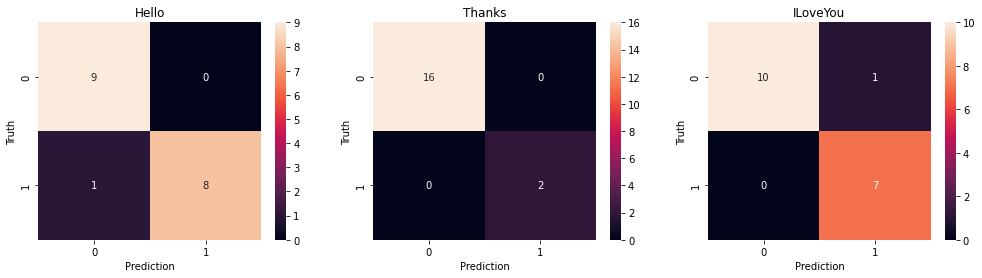

In [342]:
# Plotting the Heat Map for all action classes
fig,ax=plt.subplots(1,3,figsize=(17,4))
sn.heatmap(cm[0],annot=True,fmt='d',ax=ax[0]).set(title='Hello')
sn.heatmap(cm[1],annot=True,fmt='d',ax=ax[1]).set(title='Thanks')
sn.heatmap(cm[2],annot=True,fmt='d',ax=ax[2]).set(title='ILoveYou')
for ax in ax.flat:
    ax.set(xlabel='Prediction', ylabel='Truth')
plt.show()

### Real time testing

In [46]:
from scipy import stats

In [47]:
# Intializing the colours for the text
colors = [(245,117,16), (117,245,16), (16,117,245)]
# Function to visualize the probability of each action
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [114]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.3 

cap = cv2.VideoCapture(0)
# Setting the Mediapipe Model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Reading the camera OpenCV feed 
        ret, frame = cap.read()

        # Making detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Drawing face,hand and pose landmarks
        draw_styled_landmarks(image, results)
        
        # Making Prediction
        keypoints = extract_keypoints(results)
        #Appending the text with maximum probability
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        # Visualization logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Visualizing probabilities with colours in the text 
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Showing on screen
        cv2.imshow('OpenCV Feed', image)

        # Breaking the feed and releasing the camera
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

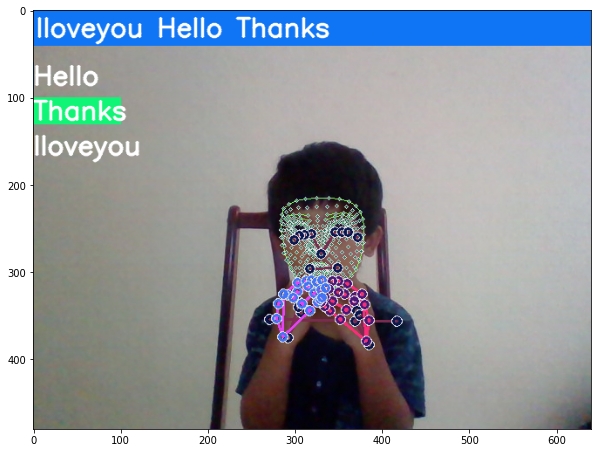

In [115]:
#Plotting the last frame
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors),cv2.COLOR_BGR2RGB))